# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import splitfolders

In [3]:
# Data splitting
input_path = 'binary_data/'
splitfolders.ratio(input_path, output="binary_data_split",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) 

## Data Preprocessing

### Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'binary_data_split/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 581 files belonging to 2 classes.


### Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'binary_data_split/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 72 files belonging to 2 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [7]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/opt/anaconda3/envs/disease_classification/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=600,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.2)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

### Compiling and Training Phase

In [18]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 600)            │     1,229,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,942,826 (22.67 MB)

 Trainable params: 5,942,826 (22.67 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5346 - loss: 1.1008 - val_accuracy: 0.5972 - val_loss: 0.6784
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6022 - loss: 0.6847 - val_accuracy: 0.5972 - val_loss: 0.6732
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5698 - loss: 0.6787 - val_accuracy: 0.5972 - val_loss: 0.6788
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5809 - loss: 0.6887 - val_accuracy: 0.5972 - val_loss: 0.6777
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5825 - loss: 0.6761 - val_accuracy: 0.5972 - val_loss: 0.6772
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5830 - loss: 0.6797 - val_accuracy: 0.5972 - val_loss: 0.6764
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5831 - loss: 0.6823 - val_accuracy: 0.5972 - val_loss: 0.6760
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5869 - loss: 0.6847 - val_accuracy: 0.5972 - val_loss:

## Evaluating Model

In [21]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 415ms/step - accuracy: 0.5869 - loss: 0.6798
Training accuracy: 0.5920826196670532


In [22]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.5693 - loss: 0.6919
Validation accuracy: 0.5972222089767456


### Saving Model

In [23]:
cnn.save('trained_plant_disease_model.keras')

In [272]:
training_history.history #Return Dictionary of history

{'loss': [1.3926340341567993,
  0.5093422532081604,
  0.332528293132782,
  0.25064608454704285,
  0.1961534023284912,
  0.16193240880966187,
  0.14591246843338013,
  0.12622447311878204,
  0.10997208952903748,
  0.10591727495193481],
 'accuracy': [0.5917917490005493,
  0.8418664336204529,
  0.8951276540756226,
  0.9225834012031555,
  0.9405078887939453,
  0.9505512714385986,
  0.9559854865074158,
  0.9632833003997803,
  0.9678924679756165,
  0.9702112674713135],
 'val_loss': [0.4670976996421814,
  0.33370524644851685,
  0.22960424423217773,
  0.2608007490634918,
  0.2714437246322632,
  0.21357299387454987,
  0.20022274553775787,
  0.18895581364631653,
  0.3728276193141937,
  0.24945156276226044],
 'val_accuracy': [0.8498747944831848,
  0.8961415886878967,
  0.9271568655967712,
  0.9266446828842163,
  0.9191327095031738,
  0.9352378845214844,
  0.9422376751899719,
  0.9466765522956848,
  0.9220350384712219,
  0.9458798170089722]}

In [273]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [274]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

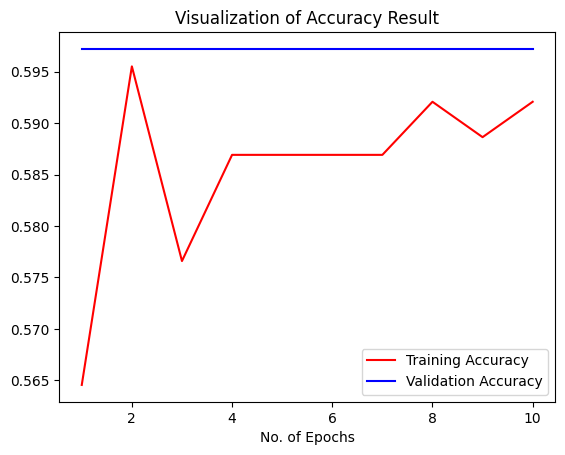

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [402]:
class_name = validation_set.class_names

In [403]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [404]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 115s 7ms/step


In [405]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [406]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [407]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

ModuleNotFoundError: No module named 'sklearn'

In [34]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

NameError: name 'classification_report' is not defined

### Confusion Matrix Visualization

In [32]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

NameError: name 'cm' is not defined

<Figure size 4000x4000 with 0 Axes>

In [31]:
import numpy as np
from PIL import Image

def model_prediction(test_image):
    model = tf.keras.models.load_model("trained_plant_disease_model.keras")
    image = tf.keras.preprocessing.image.load_img(test_image,target_size=(128,128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr]) #convert single image to batch
    predictions = model.predict(input_arr)
    return np.argmax(predictions), predictions #return index of max element

model_prediction('binary_data_split/test/Pokkah Boeng/Pokkah Boeng293.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


(0, array([[0.67517954, 0.32482046]], dtype=float32))